In [83]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt



In [84]:
IMAGE_SIZE = [176, 208]

# Data Loading

In [85]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory("./Alzheimer_s Dataset/train", validation_split=0.2, seed=1818,
    image_size=IMAGE_SIZE, subset="training", batch_size=64)

val_ds = tf.keras.preprocessing.image_dataset_from_directory("./Alzheimer_s Dataset/train", validation_split=0.2, seed=1818,
    image_size=IMAGE_SIZE, subset="validation", batch_size=64)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [86]:
class_names = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']
train_ds.class_names = class_names
val_ds.class_names = class_names
NUM_CLASSES = len(class_names)

# Visualizing Data

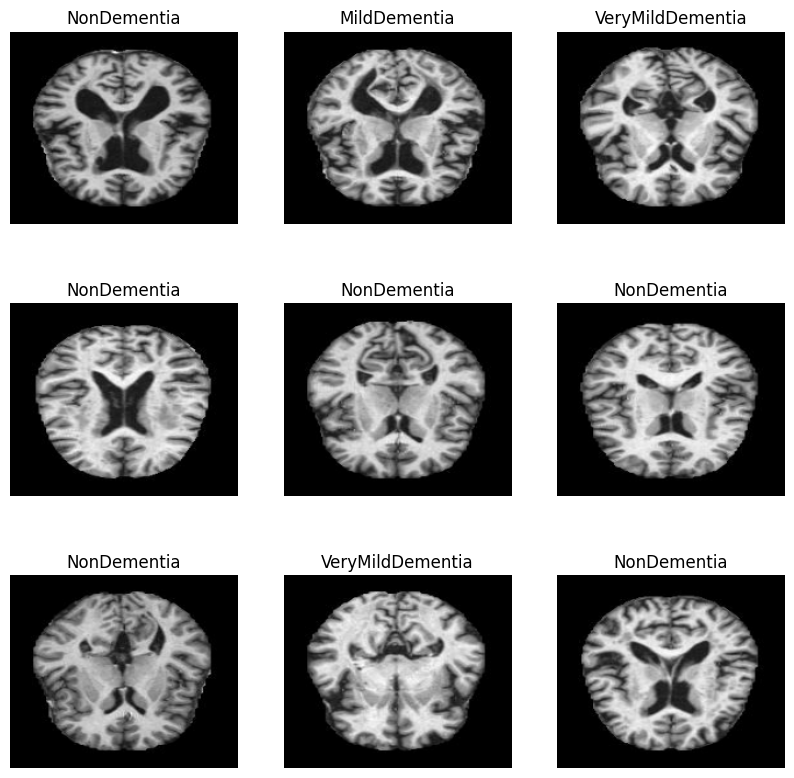

In [87]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

# Feature Engineering

In [88]:
def one_hot_label(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

train_ds = train_ds.map(one_hot_label)
val_ds = val_ds.map(one_hot_label)

In [89]:
NUM_IMAGES = []

for label in class_names:
    dir_name = "./Alzheimer_s Dataset/train/" + label[:-2] + 'ed'
    NUM_IMAGES.append(len([name for name in os.listdir(dir_name)]))

In [90]:
NUM_IMAGES

[717, 52, 2560, 1792]

# Neural Network

In [91]:
init = tf.keras.initializers.GlorotUniform()
mode = tf.keras.Sequential([
    tf.keras.Input(shape=(*IMAGE_SIZE, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_uniform', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    tf.keras.layers.Dense(64, kernel_initializer='he_uniform', activation='relu'),
    tf.keras.layers.Dense(4, kernel_initializer=init, activation='softmax')
])

# Compiling Model

In [113]:

mode.compile(loss='categorical_crossentropy', optimizer='adam', metrics=rocauc)

# Training Model

In [104]:
history = mode.fit(train_ds, validation_data=val_ds, epochs=50, shuffle=True, verbose=1)

Epoch 1/50


2023-01-08 14:14:26.209816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - ETA: 0s - loss: 2.9201 - auc: 0.8073

2023-01-08 14:14:32.599279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - 7s 104ms/step - loss: 2.9201 - auc: 0.8073 - val_loss: 1.1726 - val_auc: 0.8465
Epoch 2/50
65/65 [==============================] - 6s 99ms/step - loss: 0.6306 - auc: 0.9508 - val_loss: 0.8252 - val_auc: 0.9213
Epoch 3/50
65/65 [==============================] - 7s 101ms/step - loss: 0.2942 - auc: 0.9855 - val_loss: 0.4564 - val_auc: 0.9637
Epoch 4/50
65/65 [==============================] - 6s 99ms/step - loss: 0.1145 - auc: 0.9979 - val_loss: 0.4235 - val_auc: 0.9724
Epoch 5/50
65/65 [==============================] - 7s 101ms/step - loss: 0.0485 - auc: 0.9997 - val_loss: 0.4153 - val_auc: 0.9746
Epoch 6/50
65/65 [==============================] - 6s 98ms/step - loss: 0.0271 - auc: 0.9999 - val_loss: 0.3986 - val_auc: 0.9743
Epoch 7/50
65/65 [==============================] - 7s 100ms/step - loss: 0.0200 - auc: 1.0000 - val_loss: 0.5216 - val_auc: 0.9654
Epoch 8/50
65/65 [==============================] - 7s 101ms/step - loss: 0.0147 - auc: 1.

In [105]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory("./Alzheimer_s Dataset/test", image_size=IMAGE_SIZE,
batch_size=64)

test_ds = test_ds.map(one_hot_label)

Found 1279 files belonging to 4 classes.


In [106]:
res = mode.evaluate(test_ds)

20/20 [==============================] - 1s 40ms/step - loss: 7.5997 - auc: 0.7313


In [107]:
res = mode.evaluate(test_ds)

20/20 [==============================] - 1s 37ms/step - loss: 7.5997 - auc: 0.7313


In [108]:
mode.predict(test_ds)

 3/20 [===>..........................] - ETA: 0s

2023-01-08 14:20:01.441354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 1s 34ms/step


array([[4.5683774e-07, 3.1475503e-10, 9.9383485e-01, 6.1646439e-03],
       [3.3104227e-13, 3.0494163e-16, 5.2288033e-06, 9.9999475e-01],
       [1.1988570e-07, 6.9210972e-16, 9.9999964e-01, 2.9169180e-07],
       ...,
       [5.7504707e-16, 1.3567830e-19, 1.2592558e-02, 9.8740745e-01],
       [2.0202113e-13, 3.9014581e-20, 8.5770631e-14, 1.0000000e+00],
       [2.2732257e-11, 2.3409474e-21, 5.0023984e-05, 9.9994993e-01]],
      dtype=float32)

In [109]:
len(test)

20

In [110]:
prediction = mode.predict(test)

20/20 [==============================] - 1s 34ms/step


In [111]:
def find(arr):
    ind, val = 0, arr[0]
    for i in range(1, NUM_CLASSES):
        if arr[i] > val:
            val =  arr[i]
            ind = i
    return ind       

In [112]:
for val in prediction:
    print(class_names[find(val)])

NonDementia
NonDementia
VeryMildDementia
VeryMildDementia
NonDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
NonDementia
NonDementia
VeryMildDementia
NonDementia
VeryMildDementia
NonDementia
MildDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
NonDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
NonDementia
MildDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
NonDementia
VeryMildDementia
NonDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
NonDementia
MildDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
NonDementia
VeryMildDementia
NonDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
MildDementia
NonDementia
VeryMildDementia
VeryMildDementia
NonDementia
VeryMildDementia
VeryMildDementia
VeryMildDementia
MildDementia
NonDementia
NonDementia
VeryMildDementia
VeryM